# Boston housing

First, load the dataset from scikitlearn, define the target and features.

In [39]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
boston_dict = datasets.load_boston()

X = boston_dict.data
y = boston_dict.target
boston = pd.DataFrame(X, columns=boston_dict.feature_names)
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Predict using a single feature, the number of rooms (RM):

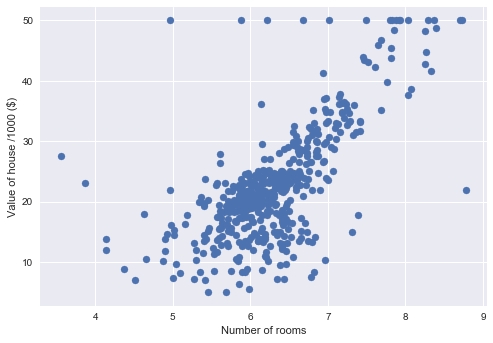

In [7]:
X_rooms = X[:,5]

#keep the first dimension, add another dimension of size 1 to X:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

_ = plt.scatter(X_rooms,y)
plt.xlabel("Number of rooms")
plt.ylabel("Value of house /1000 ($)")
plt.show()

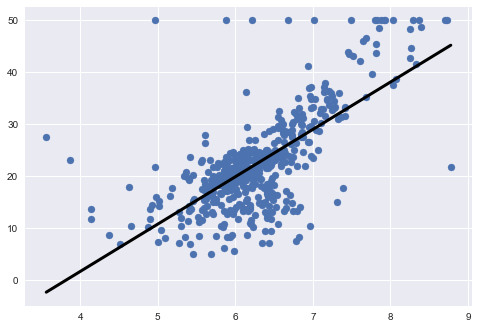

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms,y)

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
_ = plt.scatter(X_rooms,y)
_ = plt.plot(prediction_space, reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

Now lets add all the rest of the features:

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

acc = reg_all.score(X_test,y_test)
print(acc)

0.7109203586326351


Generally, never use linear regression "out of the box" like this.  First use regularization to place further constraints on the model coefficients.

Also, the accuracy metric (R-squared or root-mean-squared error) is dependent on the choice of train-test split.  To fix this, we do k-fold cross validation, where k is the number of folds.  More folds = more computationally intensive. The default output is k r-squared values

In [36]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg_all,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
0.3507413509325187


Regularization is used to penalize large coefficients in the loss function so that we don't overfit.

Ridge regularization: loss function = OLS loss function + alpha*sum(coefficients^2)

alpha is a parameter controling model complexity.  Low alpha leads to overfitting, high alpha leads to underfitting.

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge_score = ridge.score(X_test,y_test)
print(ridge_score)

0.6995565027100421


Lasso regularization: loss function = OLS loss function + alpha*sum(abs(coefficients))

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso_score = lasso.score(X_test,y_test)
print(lasso_score)

0.5950229292587828


Lasso regression can be used to select the important features of a dataset because it shrinks the coefficients of less important features to exactly 0.

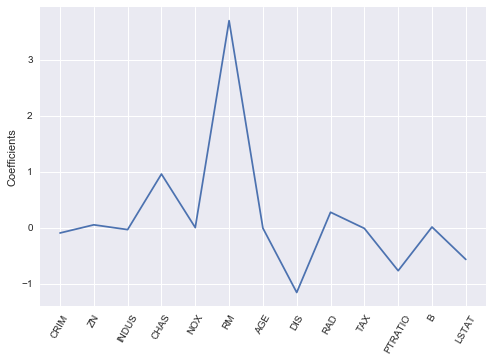

In [45]:
names = boston.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

# Gapminder

In [25]:
# Read the CSV file into a DataFrame: df
from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv'
urlretrieve(url, 'dc_gapminder_pred.csv')
df = pd.read_csv('dc_gapminder_pred.csv')

# Create arrays for features and target variable
y = df.life.values
X = df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


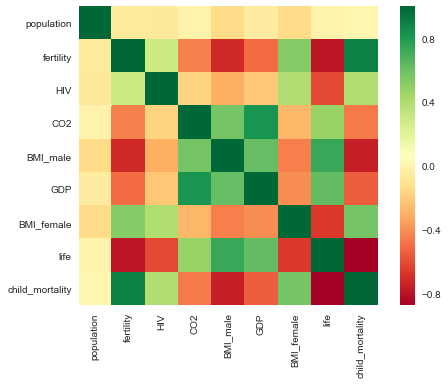

In [26]:
import seaborn as sns
_ = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


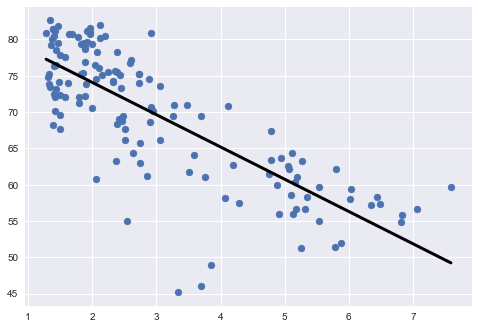

In [27]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

X_fertility = df.fertility.values.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
_ = plt.scatter(X_fertility,y)
_ = plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop(['life','Region'], axis=1).values
y = df.life.values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430138
Root Mean Squared Error: 3.247601080036943


In [47]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793508


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


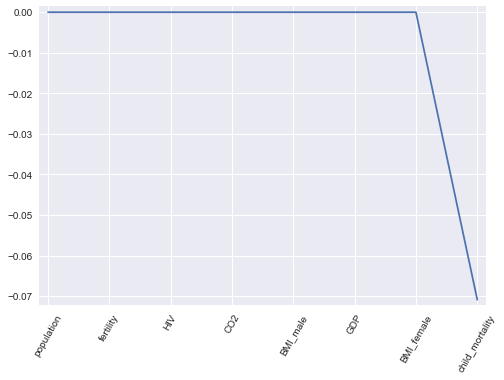

In [49]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

df_columns = df.drop(['life','Region'], axis=1).columns
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [50]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

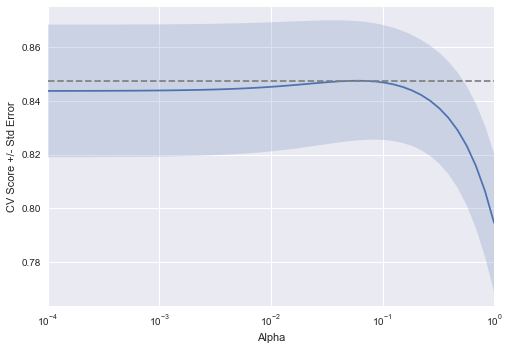

In [51]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [52]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.05791413339844


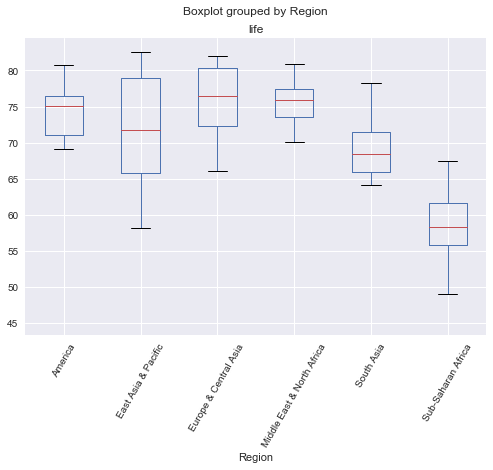

In [53]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('dc_gapminder_pred.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [54]:
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Drop first takes out the unneeded dummy variable, in this cast 'Region_America'

In [56]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.87758867 0.80165479 0.86362808 0.8071264  0.86761116]
